In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
gender = pd.read_csv('./gender_submission.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
def check_NaN_in_each_columns(data):
    column_names = list(data)

    for i in range(len(column_names)):
        x = data[column_names[i]].isnull().sum()
        print(column_names[i], 'has', x, 'NaNs.')

In [5]:
check_NaN_in_each_columns(train)

PassengerId has 0 NaNs.
Survived has 0 NaNs.
Pclass has 0 NaNs.
Name has 0 NaNs.
Sex has 0 NaNs.
Age has 177 NaNs.
SibSp has 0 NaNs.
Parch has 0 NaNs.
Ticket has 0 NaNs.
Fare has 0 NaNs.
Cabin has 687 NaNs.
Embarked has 2 NaNs.


In [6]:
def check_unique_features_in_each_column(data):
    column_names = list(data)

    for i in range(len(column_names)):
        print(column_names[i], 'has', len(data[column_names[i]].unique()), 'unique features.')

In [7]:
check_unique_features_in_each_column(train)

PassengerId has 891 unique features.
Survived has 2 unique features.
Pclass has 3 unique features.
Name has 891 unique features.
Sex has 2 unique features.
Age has 89 unique features.
SibSp has 7 unique features.
Parch has 7 unique features.
Ticket has 681 unique features.
Fare has 248 unique features.
Cabin has 148 unique features.
Embarked has 4 unique features.


In [8]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_p = train.copy()

In [33]:
test_p = test.copy()

In [35]:
check_NaN_in_each_columns(test)

PassengerId has 0 NaNs.
Pclass has 0 NaNs.
Name has 0 NaNs.
Sex has 0 NaNs.
Age has 86 NaNs.
SibSp has 0 NaNs.
Parch has 0 NaNs.
Ticket has 0 NaNs.
Fare has 1 NaNs.
Cabin has 327 NaNs.
Embarked has 0 NaNs.


In [11]:
survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

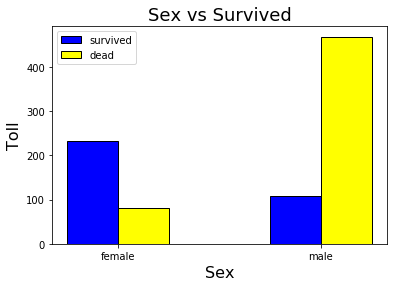

survival rate for female is 0.7420382165605095
survival rate for male is 0.18890814558058924


In [36]:
category=['survived','dead']
condition=sorted(train.Sex.unique().tolist())

pos = np.arange(len(condition))
bar_width = 0.25

s = []
d = []
for i in range(len(condition)):
    s.append(len(survived[survived.Sex == condition[i]]))
    d.append(len(dead[dead.Sex == condition[i]]))

plt.bar(pos, s, bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d, bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width/2, condition)
plt.xlabel('Sex', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Sex vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Sex_p = []

for i in range(len(condition)):
    x = len(survived[survived.Sex == condition[i]])/len(train[train.Sex == condition[i]])
    Sex_p.append(x)
    print('survival rate for', condition[i], 'is', x)
    
for i in range(len(condition)):
    train_p = train_p.replace({'Sex': condition[i]}, Sex_p[i])
    test_p = test_p.replace({'Sex': condition[i]}, Sex_p[i]) 
    

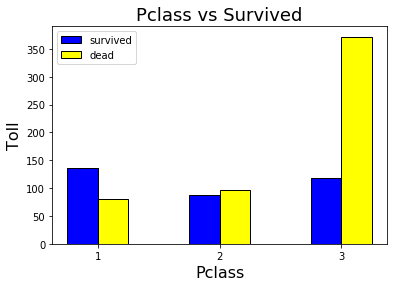

survival rate for class 1 is 0.6296296296296297
survival rate for class 2 is 0.47282608695652173
survival rate for class 3 is 0.24236252545824846


In [38]:
category = ['survived','dead']
condition=sorted(train.Pclass.unique().tolist())

pos = np.arange(len(condition))
bar_width = 0.25

s = []
d = []
for i in range(len(condition)):
    s.append(len(survived[survived.Pclass == condition[i]]))
    d.append(len(dead[dead.Pclass == condition[i]]))


plt.bar(pos, s, bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d ,bar_width,color='yellow',edgecolor='black')

plt.xticks(pos+bar_width/2, condition)
plt.xlabel('Pclass', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Pclass vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Pclass_p = []

for i in range(len(condition)):
    x = len(survived[survived.Pclass == condition[i]])/len(train[train.Pclass == condition[i]])
    Pclass_p.append(x)
    print('survival rate for class', condition[i], 'is', x)
    
for i in range(len(condition)):
    train_p = train_p.replace({'Pclass': condition[i]}, Pclass_p[i])
    test_p = test_p.replace({'Pclass': condition[i]}, Pclass_p[i])
    

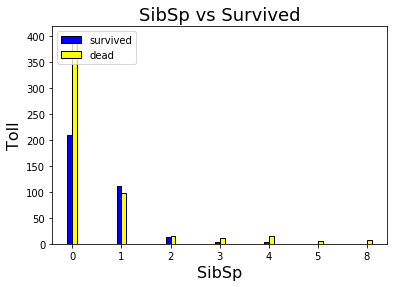

survival rate for SibSp 0 is 0.34539473684210525
survival rate for SibSp 1 is 0.5358851674641149
survival rate for SibSp 2 is 0.4642857142857143
survival rate for SibSp 3 is 0.25
survival rate for SibSp 4 is 0.16666666666666666
survival rate for SibSp 5 is 0.0
survival rate for SibSp 8 is 0.0


In [39]:
category=['survived','dead']
condition=sorted(train.SibSp.unique().tolist())

pos = np.arange(len(condition))
bar_width = 0.1

s = []
d = []
for i in range(len(condition)):
    s.append(len(survived[survived.SibSp == condition[i]]))
    d.append(len(dead[dead.SibSp == condition[i]]))

plt.bar(pos, s, bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,d,bar_width,color='yellow',edgecolor='black')

plt.xticks(pos+bar_width/2, condition)
plt.xlabel('SibSp', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('SibSp vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

SibSp_p =[]

for i in range(len(condition)):
    x = len(survived[survived.SibSp == condition[i]])/len(train[train.SibSp == condition[i]])
    SibSp_p.append(x)
    print('survival rate for SibSp', condition[i], 'is', x)
    
for i in range(len(condition)):
    train_p = train_p.replace({'SibSp': condition[i]}, SibSp_p[i]) 
    test_p = test_p.replace({'SibSp': condition[i]}, SibSp_p[i]) 


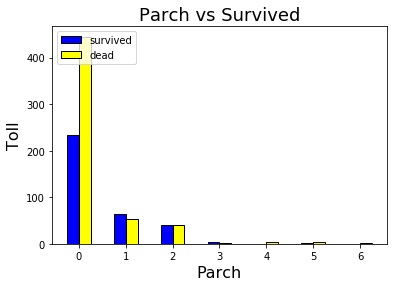

survival rate for Parch 0 is 0.34365781710914456
survival rate for Parch 1 is 0.5508474576271186
survival rate for Parch 2 is 0.5
survival rate for Parch 3 is 0.6
survival rate for Parch 4 is 0.0
survival rate for Parch 5 is 0.2
survival rate for Parch 6 is 0.0


In [40]:
category=['survived','dead']
condition=sorted(train.Parch.unique().tolist())

pos = np.arange(len(condition))
bar_width = 0.25

s = []
d = []
for i in range(len(condition)):
    s.append(len(survived[survived.Parch == condition[i]]))
    d.append(len(dead[dead.Parch == condition[i]]))

plt.bar(pos, s, bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d, bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width/2, condition)
plt.xlabel('Parch', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Parch vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Parch_p = []

for i in range(len(condition)):
    x = len(survived[survived.Parch == condition[i]])/len(train[train.Parch == condition[i]])
    Parch_p.append(x)
    print('survival rate for Parch', condition[i], 'is', x)
    
for i in range(len(condition)):
    train_p = train_p.replace({'Parch': condition[i]}, Parch_p[i]) 
    test_p = test_p.replace({'Parch': condition[i]}, Parch_p[i]) 

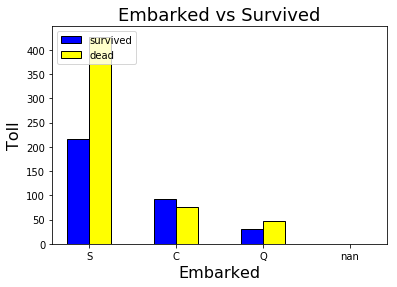

survival rate for Embarked at S is 0.33695652173913043
survival rate for Embarked at C is 0.5535714285714286
survival rate for Embarked at Q is 0.38961038961038963


In [41]:
category=['survived','dead']
condition= train.Embarked.unique()

pos = np.arange(len(condition))
bar_width = 0.25

s = []
d = []
for i in range(len(condition)):
    s.append(len(survived[survived.Embarked == condition[i]]))
    d.append(len(dead[dead.Embarked == condition[i]]))

plt.bar(pos, s, bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d, bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width/2, condition)
plt.xlabel('Embarked', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Embarked vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Embarked_p = []

for i in range(len(condition)-1):
    x = len(survived[survived.Embarked == condition[i]])/len(train[train.Embarked == condition[i]])
    Embarked_p.append(x)
    print('survival rate for Embarked at', condition[i], 'is', x)
    
for i in range(len(condition)-1):
    train_p = train_p.replace({'Embarked': condition[i]}, Embarked_p[i])
    test_p = test_p.replace({'Embarked': condition[i]}, Embarked_p[i])

train_p['Embarked'].fillna(0.5, inplace=True)
test_p['Embarked'].fillna(0.5, inplace=True)

In [17]:
pd.notna(condition)

array([ True,  True,  True, False])

In [18]:
np.histogram(train['Fare'], bins = 51)

(array([336, 179, 144,  57,  15,  38,  17,  31,  17,   4,   4,  11,   0,
          7,   2,   7,   2,   0,   0,   0,   0,   4,   5,   0,   2,   0,
          6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3],
       dtype=int64),
 array([  0.        ,  10.04567059,  20.09134118,  30.13701176,
         40.18268235,  50.22835294,  60.27402353,  70.31969412,
         80.36536471,  90.41103529, 100.45670588, 110.50237647,
        120.54804706, 130.59371765, 140.63938824, 150.68505882,
        160.73072941, 170.7764    , 180.82207059, 190.86774118,
        200.91341176, 210.95908235, 221.00475294, 231.05042353,
        241.09609412, 251.14176471, 261.18743529, 271.23310588,
        281.27877647, 291.32444706, 301.37011765, 311.41578824,
        321.46145882, 331.50712941, 341.5528    , 351.59847059,
        361.64414118, 371.68981176, 381.73548235, 391.78115294,
        401.82682353, 411.87249412, 421.91816471, 4

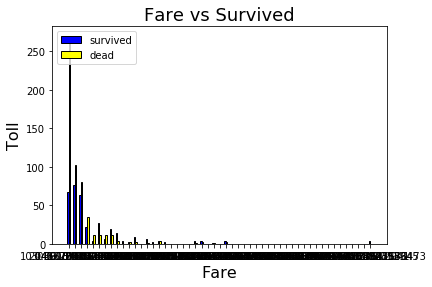

survival rate for fare range 0.0 to 10.045670588235295 is 0.19940476190476192
survival rate for fare range 10.045670588235295 to 20.09134117647059 is 0.4245810055865922
survival rate for fare range 20.09134117647059 to 30.137011764705882 is 0.4444444444444444
survival rate for fare range 30.137011764705882 to 40.18268235294118 is 0.38596491228070173
survival rate for fare range 40.18268235294118 to 50.228352941176475 is 0.26666666666666666
survival rate for fare range 50.228352941176475 to 60.274023529411764 is 0.7105263157894737
survival rate for fare range 60.274023529411764 to 70.31969411764706 is 0.35294117647058826
survival rate for fare range 70.31969411764706 to 80.36536470588236 is 0.6129032258064516
survival rate for fare range 80.36536470588236 to 90.41103529411765 is 0.8235294117647058
survival rate for fare range 90.41103529411765 to 100.45670588235295 is 1.0
survival rate for fare range 100.45670588235295 to 110.50237647058825 is 0.5
survival rate for fare range 110.502376

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


In [43]:
category=['survived','dead']
s = np.histogram(survived['Fare'], bins = 51)
condition=s[1]
d = np.histogram(dead['Fare'], range=(0, 512.3292), bins = 51)

pos = np.arange(len(s[0]))

plt.bar(pos, s[0], bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d[0], bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width/2, condition)
plt.xlabel('Fare', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Fare vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Fare_p = []

for i in range(len(condition)-1):
    x = np.histogram(survived['Fare'], bins = 51)[0][i]/np.histogram(train['Fare'], bins = 51)[0][i]
    if pd.notna(x) == True:
        print('survival rate for fare range', condition[i], 'to', condition[i+1], 'is', x)
        Fare_p.append(x)
    else:
        Fare_p.append(0.5)
        
x = train.Fare.as_matrix()
y = np.histogram(train['Fare'], bins = 51)
bins = y[1]
inds = np.digitize(x, bins, right = False)
inds[inds == 52] = 51
train_p.Fare = inds

z = test.Fare.as_matrix()
inds_z = np.digitize(z, bins, right = False)
inds_z[inds_z == 52] = 51
test_p.Fare = inds_z 
        
for i in range(len(Fare_p)):
    train_p = train_p.replace({'Fare': i + 1 }, Fare_p[i])
    test_p = test_p.replace({'Fare': i + 1 }, Fare_p[i])

In [44]:
train[train.Age == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [45]:
test[test.Age == 80]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


C:\Users\Jason\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jason\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


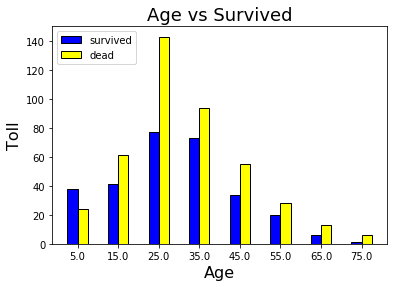

survival rate for Age range 0.0 to 10.0 is 0.6129032258064516
survival rate for Age range 10.0 to 20.0 is 0.4019607843137255
survival rate for Age range 20.0 to 30.0 is 0.35
survival rate for Age range 30.0 to 40.0 is 0.437125748502994
survival rate for Age range 40.0 to 50.0 is 0.38202247191011235
survival rate for Age range 50.0 to 60.0 is 0.4166666666666667
survival rate for Age range 60.0 to 70.0 is 0.3157894736842105
survival rate for Age range 70.0 to 80.0 is 0.14285714285714285


In [46]:
category=['survived','dead']


s = np.histogram(survived['Age'], range= (0,80),  bins = 8)
condition=s[1]
d = np.histogram(dead['Age'], range=(0, 80), bins = 8)

pos = np.arange(len(s[0]))

plt.bar(pos, s[0], bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width, d[0], bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width/2, condition + 5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Toll', fontsize=16)
plt.title('Age vs Survived',fontsize=18)
plt.legend(category,loc=2)
plt.show()

Age_p = []

for i in range(len(condition)-1):
    x = np.histogram(survived['Age'],range= (0,80), bins = 8)[0][i]/np.histogram(train['Age'],range= (0,80), bins = 8)[0][i]
    print('survival rate for Age range', condition[i], 'to', condition[i+1], 'is', x)
    Age_p.append(x)
    
x = train.Age.as_matrix()
y = np.histogram(train['Age'], range = (0,80), bins = 8)
bins = y[1]
inds = np.digitize(x, bins, right = False)
np.put(inds, 630, 8)
train_p.Age = inds

z = test.Age.as_matrix()
inds_z = np.digitize(z, bins, right = False)
test_p.Age = inds_z
    
for i in range(0,9):
    if i < 8:
        train_p = train_p.replace({'Age': i + 1 }, Age_p[i]) 
        test_p = test_p.replace({'Age': i + 1 }, Age_p[i]) 
    else:
        train_p = train_p.replace({'Age': i + 1 }, 0.5)
        test_p = test_p.replace({'Age': i + 1 }, 0.5)
        

In [47]:
X = train_p[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].as_matrix()
y = train_p['Survived'].as_matrix()

Z = test_p[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].as_matrix()

data = X.copy()
target = y.copy()

data_test = Z.copy()

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.2, random_state=42)

In [23]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 45
Accuracy is  0.7486033519553073


In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 39
Accuracy is  0.7821229050279329


In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 53
Accuracy is  0.7039106145251397


In [26]:
from sklearn import svm

clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 39
Accuracy is  0.7821229050279329


In [27]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 29
Accuracy is  0.8379888268156425


In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 27
Accuracy is  0.8491620111731844


In [29]:
clf.fit(X_train, y_train).predict(X_test)[0]

0

In [30]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy is ",  (y_test == y_pred).sum() / X_test.shape[0] )

Number of mislabeled points out of a total 179 points : 37
Accuracy is  0.7932960893854749


Test Outputs

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [62]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [63]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [64]:
from sklearn import svm

clf = svm.SVC()

y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)

y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)

In [67]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

y_pred = clf.fit(data, target).predict(data_test)

array = []

for i in range(len(test)):
    row = []
    
    row.append(test.PassengerId[i])
    row.append(y_pred[i])
    
    array.append(row)    
    
labels = ['PassengerId', 'Survived']

df_submission = pd.DataFrame(array, columns = labels)

df_submission.to_csv('output.csv', encoding='utf-8', index=False)